In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/big-data-derby-2022/nyra_tracking_table.csv
/kaggle/input/big-data-derby-2022/nyra_start_table.csv
/kaggle/input/big-data-derby-2022/nyra_race_table.csv
/kaggle/input/big-data-derby-2022/nyra_2019_complete.csv


In [4]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
#import statsmodels.api as sm
import seaborn as sns

In [5]:
race = pd.read_csv('/kaggle/input/big-data-derby-2022/nyra_race_table.csv')
start = pd.read_csv('/kaggle/input/big-data-derby-2022/nyra_start_table.csv', header=None)
track = pd.read_csv('/kaggle/input/big-data-derby-2022/nyra_tracking_table.csv')

In [6]:
race.head()

,track_id,race_date,race_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time
0,AQU,2019-01-01,1,650,D,MY,36,AOC,80000,1220
1,AQU,2019-01-01,2,600,D,MY,48,MCL,41000,1250
2,AQU,2019-01-01,3,550,D,MY,54,MCL,35000,121
3,AQU,2019-01-01,4,900,D,MY,101,AOC,80000,150
4,AQU,2019-01-01,5,700,D,MY,60,ALW,64000,220


In [7]:
start.head()

,0,1,2,3,4,5,6,7
0,AQU,2019-01-01,1,1,123,Dylan Davis,130,2
1,AQU,2019-01-01,1,2,120,Junior Alvarado,295,3
2,AQU,2019-01-01,1,3,118,Jose Lezcano,180,4
3,AQU,2019-01-01,1,4,123,Jomar Garcia,1280,5
4,AQU,2019-01-01,1,5,118,Manuel Franco,1150,1


In [8]:
start.columns = ['track_id', 'race_date', 'race_number', 'program_number', 'weight_carried', 'jockey', 'odds', 'position_at_finish']

In [9]:
track.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762


In [10]:
#change types to full forms
race_type_dict =   {'STK': 'Stakes', 'WCL': 'Waiver Claiming', 'WMC': 'Waiver Maiden Claiming', 'SST': 'Starter Stakes', 'SHP': 'Starter Handicap','CLM': 'Claiming', 
                    'STR': 'Starter Allowance', 'AOC': 'Allowance Optionl Claimer', 'SOC': 'Starter Optional Claimer', 'MCL': 'Maiden Claiming', 'ALW': 'Allowance', 
                    'MSW': 'Maiden Special Weight'}
track_condition_dict = {'MY ':'Muddy', 'GD ':'Good', 'FT ':'Fast', 'SY ':'Sloppy', 'FM ':'Firm', 'YL ':'Yielding', 'SF ':'Soft'}
start_type_dict = {'AQU': 'Aqueduct','BEL': 'Belmont', 'SAR': 'Saratoga'}
course_type_dict = {'D': 'Dirt',
             'I': 'Inner turf',
             'O': 'Outer turf',
             'T': 'Turf',
             'M': 'Hurdle'
             }


race['race_type'] = race['race_type'].map(race_type_dict)
race['track_condition'] = race['track_condition'].map(track_condition_dict)
race['track_id'] = race['track_id'].map(start_type_dict)
race['course_type'] = race['course_type'].map(course_type_dict)
start['track_id'] = start['track_id'].map(start_type_dict)
track['track_id'] = track['track_id'].map(start_type_dict)




In [11]:
start = start.merge(race, on=['track_id','race_date', 'race_number'], how='inner')

In [12]:
start.head()

,track_id,race_date,race_number,program_number,weight_carried,jockey,odds,position_at_finish,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time
0,Aqueduct,2019-01-01,1,1,123,Dylan Davis,130,2,650,Dirt,Muddy,36,Allowance Optionl Claimer,80000,1220
1,Aqueduct,2019-01-01,1,2,120,Junior Alvarado,295,3,650,Dirt,Muddy,36,Allowance Optionl Claimer,80000,1220
2,Aqueduct,2019-01-01,1,3,118,Jose Lezcano,180,4,650,Dirt,Muddy,36,Allowance Optionl Claimer,80000,1220
3,Aqueduct,2019-01-01,1,4,123,Jomar Garcia,1280,5,650,Dirt,Muddy,36,Allowance Optionl Claimer,80000,1220
4,Aqueduct,2019-01-01,1,5,118,Manuel Franco,1150,1,650,Dirt,Muddy,36,Allowance Optionl Claimer,80000,1220


In [13]:
start.course_type.unique()

array(['Dirt', 'Outer turf', 'Turf', 'Inner turf', 'Hurdle'], dtype=object)

In [14]:
start.shape, race.shape

((14915, 15), (2000, 10))

In [15]:
print('Number of Tracks:', race['track_id'].nunique())
print('Number of Races:', race.shape[0])
print('Number of Jockeys:', start['jockey'].nunique())

Number of Tracks: 3
Number of Races: 2000
Number of Jockeys: 178


In [16]:
racecs = race['track_id'].value_counts().sort_values(ascending=False)
racecs1 = race['course_type'].value_counts().sort_values(ascending=False)[:-1]

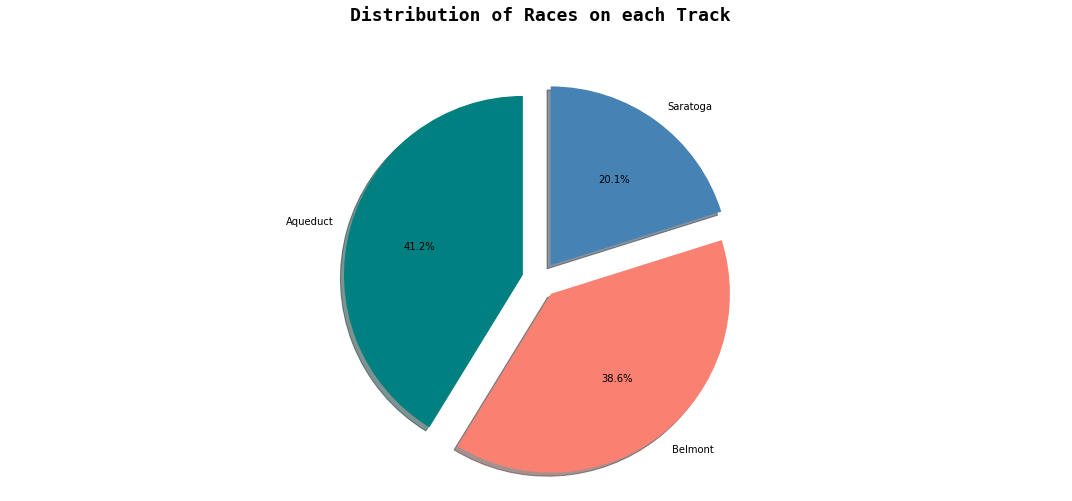

In [19]:
fig=plt.figure(figsize=(15,7),facecolor='white')
gs=fig.add_gridspec(1,1)

ax0=fig.add_subplot(gs[0,0])

colormap = ['teal', 'salmon', 'steelblue', 'navajowhite', 'mediumseagreen', 'sandybrown', 'lightslategray', 'wheat', 'crimson']

ax0.text(-0,1.45,"Distribution of Races on each Track",fontsize=18,fontweight='bold', fontfamily='monospace',ha='center')

ax0.pie(racecs.values, explode=[0.1,0.1,0.1],labels=racecs.index.values, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=colormap, )

ax0.axis('equal')

plt.tight_layout()
plt.show()

### Insights

- 41% races took place on the Aqueduct track

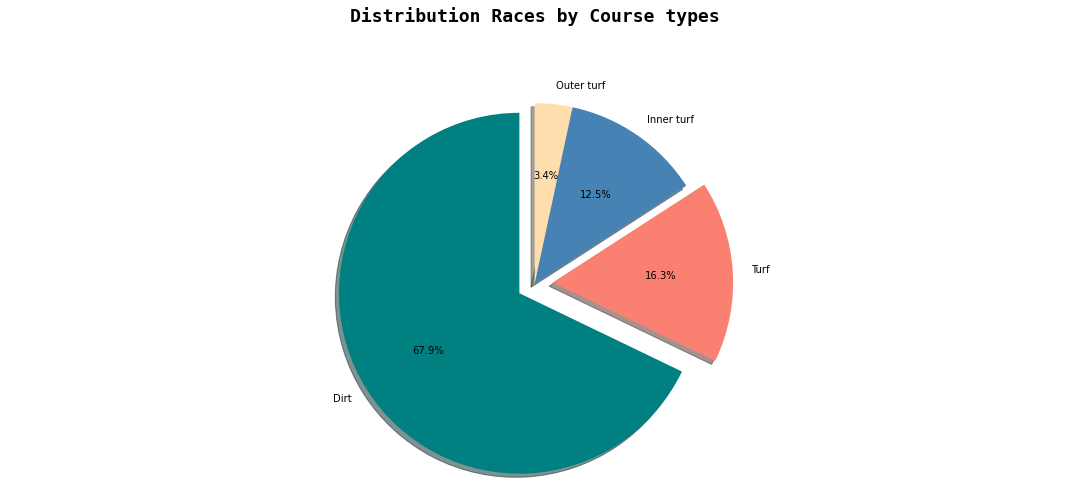

In [20]:
fig=plt.figure(figsize=(15,7),facecolor='white')
gs=fig.add_gridspec(1,1)

ax0=fig.add_subplot(gs[0,0])

ax0.text(-0,1.45,"Distribution Races by Course types",fontsize=18,fontweight='bold', fontfamily='monospace',ha='center')

ax0.pie(racecs1.values, explode=[0.1,0.1,0, 0],labels=racecs1.index.values, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=colormap)

ax0.axis('equal')

plt.tight_layout()
plt.show()

### Insights

- More than Two-Thirds of races were on Dirt Track

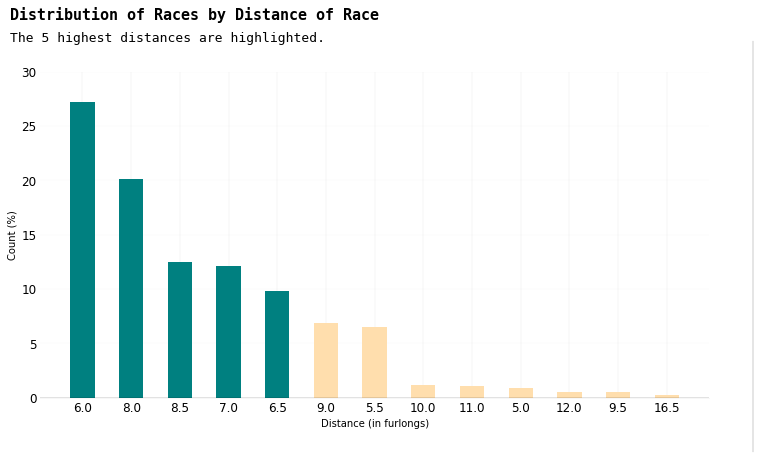

In [22]:
#https://www.kaggle.com/code/joshuaswords/netflix-data-visualization
data = race['distance_id'].value_counts().sort_values(ascending=False)/20
data.index = (data.index/100).astype(str)
data = data[data>0.1]
# Plot

color_map = ['teal' ]*5 + ['navajowhite']*(data.size - 5)


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5,
       linewidth=0.6,color=color_map)

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    

fig.text(0.09, 1, 'Distribution of Races by Distance of Race', fontsize=15, fontweight='bold', fontfamily='monospace')
fig.text(0.09, 0.95, 'The 5 highest distances are highlighted.', fontsize=13, fontweight='light', fontfamily='monospace')

import matplotlib.lines as lines
l1 = lines.Line2D([0.95, 0.95], [0, 0.95], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 35, 5) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)
ax.set_xlabel('Distance (in furlongs)')
ax.set_ylabel('Count (%)')

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(visible=True, which='major', axis='both', color='lightgray', linestyle='-', linewidth=0.2)
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_edgecolor('whitesmoke')

plt.show()


### Insights

- The distance of races ranges from 4.5 furlongs to 14 furlongs. 
- 6 to 8.5 furlongs were the 5 highest-distances in terms of number of races in 2019. 
- More than one-fourth races were in 6 furlongs.
- More than one-fifth races were in 8.5 furlongs. 
- Less than ten percent of the races were above 10 furlongs.

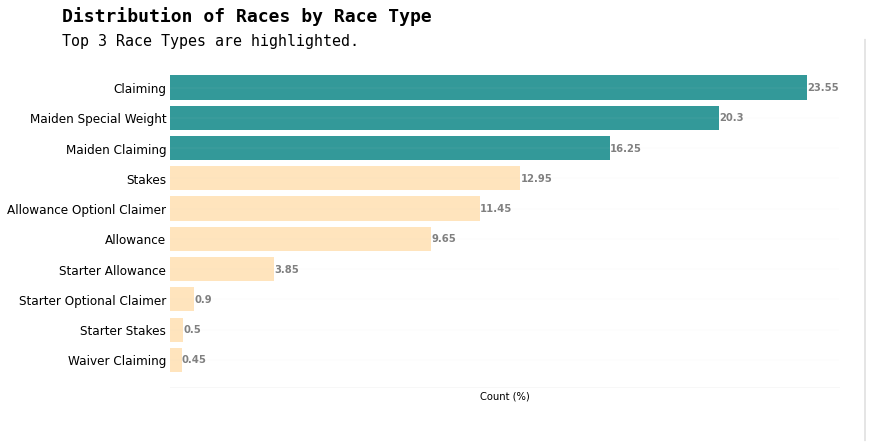

In [24]:
data = race['race_type'].value_counts().sort_values()/20
data.index = data.index.astype(str)
data = data[data>0.1]

color_map =  ['navajowhite']*(data.size - 3) + ['teal' ]*3

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.barh(y = data.index.values, width = data.values, height=0.8, color=color_map, alpha=0.8)
ax.bar_label(ax.containers[0], labels=data.values, label_type='edge', color='gray', fontsize=10, fontweight="bold")

ax.set_xlabel('Count (%)')

fig.text(0.0, 0.97, 'Distribution of Races by Race Type', fontsize=18, fontweight='bold', fontfamily='monospace')
fig.text(0.0, 0.915, 'Top 3 Race Types are highlighted.', fontsize=15, fontweight='light', fontfamily='monospace')

ax.grid(axis='y', linestyle='-', alpha=0.4)   
ax.set_xticks([])

ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(visible=True, which='major', axis='both', color='lightgray', linestyle='-', linewidth=0.2)
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_edgecolor('whitesmoke')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    

import matplotlib.lines as lines
l1 = lines.Line2D([0.93, 0.93], [0, 0.93], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

### Insights

- Claiming races accounted for more than 23% races.  
- Maiden Special Weight races accounted for around 20% races.
- Maiden Claiming races are for horses that have never won a race and are eligible to be claimed. They accounted for 16% races.
- Stakes race is a horse race in which the prize offered is made up at least in part of money (such as entry fees) put up by the owners of the horses entered. They accounted forabout 13% races.

In [25]:
data = start[['race_date', 'race_number', 'program_number']].groupby(['race_date', 'race_number',]).count()['program_number'].value_counts().sort_index() 

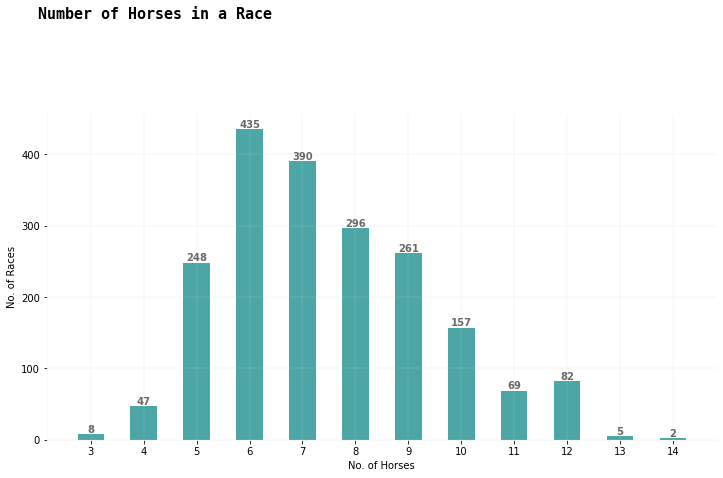

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

fig.text(0.115, 1.1, 'Number of Horses in a Race', 
         fontsize=15, fontweight='bold', fontfamily='monospace')

if data.index.dtype in ['int64', 'int32', 'float64', 'float32']:
    data.index = data.index.astype(str)

ax.bar(data.index.values, data.values, color="teal", width=.5, alpha=0.7)
ax.bar_label(ax.containers[0], labels=data.values, label_type='edge', color='dimgrey', fontsize=10, fontweight="bold")
ax.grid(visible=True, which='major', axis='both', color='lightgray', linestyle='-', linewidth=0.2)
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_edgecolor('whitesmoke')

ax.set_ylabel('No. of Races')
ax.set_xlabel('No. of Horses')

plt.show()   

### Insights

- Most races tend to have 5 to 12 horses

In [27]:
track = track.merge(race, on = ['track_id','race_date','race_number'], how='inner')

In [28]:
track.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time
0,Aqueduct,2019-01-01,9,6,72,40.672902,-73.827607,600,Dirt,Good,48,Claiming,25000,420
1,Aqueduct,2019-01-01,9,6,73,40.672946,-73.827587,600,Dirt,Good,48,Claiming,25000,420
2,Aqueduct,2019-01-01,9,6,74,40.672990,-73.827568,600,Dirt,Good,48,Claiming,25000,420
3,Aqueduct,2019-01-01,9,6,63,40.672510,-73.827781,600,Dirt,Good,48,Claiming,25000,420
4,Aqueduct,2019-01-01,9,6,64,40.672553,-73.827762,600,Dirt,Good,48,Claiming,25000,420


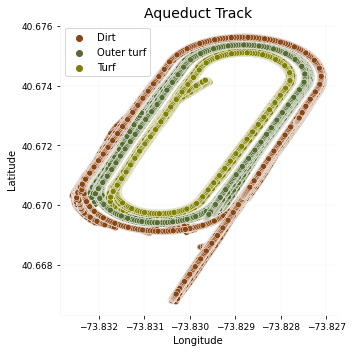

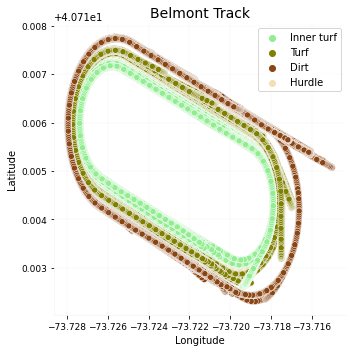

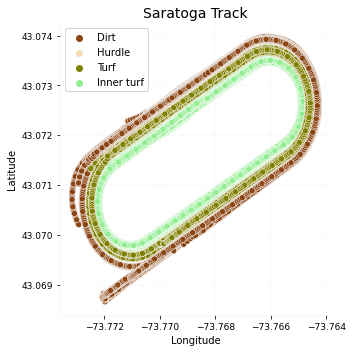

In [30]:
color_dict = {'Dirt' : 'saddlebrown',
             'Inner turf' : 'lightgreen',
             'Outer turf' : 'darkolivegreen',
             'Turf' : 'olive',
             'Hurdle' : 'wheat'
             }



for track_id in ['Aqueduct', 'Belmont', 'Saratoga']:
    plt.figure(figsize = (5, 5))

    sns.scatterplot(data = track[(track["track_id"] == track_id) & (track["program_number"] == '1  ')], 
                    x = "longitude", y = "latitude", 
                    hue = "course_type", 
                    marker='o',
                   palette=color_dict, )

    plt.title(track_id+" Track",  fontsize=14, loc='center')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.grid(visible=True, which='major', axis='both', color='lightgray', linestyle='-', linewidth=0.1)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.gca().spines[['bottom', 'left']].set_edgecolor('whitesmoke')

    plt.yticks(fontsize=9, )
    plt.xticks(fontsize=9, )
    plt.tight_layout()
    plt.legend()
    plt.show()

In [33]:
def get_time_(x):
    v = '12:00'
    if (x is None)|(x is np.nan):
        return v
    else:
        x = str(x)
        x1 = int(x[:-2])
        x2 = int(x[-2:])
        if x1<10:
            x1 += 12
        if x2<22:
            v = f'{x1}:00'
        elif x2< 48: 
            v = f'{x1}:30'
        else: 
            v = f'{x1+1}:00'
    return v

In [34]:
race_date = pd.to_datetime(race['race_date'])



rd = pd.DataFrame(data={'weekday': race_date.dt.weekday, 
                        'month_name':race_date.dt.strftime("%b"),
                        'month':race_date.dt.month,
                        'week': race_date.dt.isocalendar().week,
                        'day_name': race_date.dt.day_name(),
                        'race_number': race['race_number'], 
                        'post_time': race['post_time'].apply(get_time_),
                        'track': race['track_id'] ,
                       }
                 )

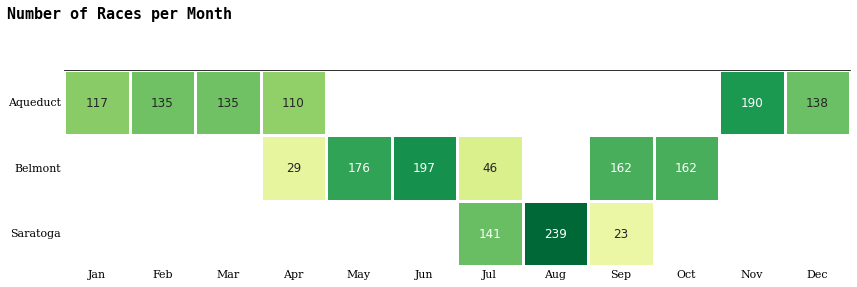

In [35]:
cs = pd.pivot_table(rd, index=['track'], columns=['month'], values='day_name', aggfunc=np.size)

mnth_map = rd[['month', 'month_name']].drop_duplicates().sort_values(by='month').set_index(keys='month').to_dict()['month_name']

cs.columns = [mnth_map[a] for a in cs.columns]
cs.index.name=''

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.heatmap(cs, xticklabels=cs.columns, yticklabels=cs.index, cmap='RdYlGn', square=True, linewidth=2.5,cbar=False,
            center=0, annot=True,  fmt='.0f', 
            ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)

fig.text(.012, .915, 'Number of Races per Month', fontweight='bold', fontfamily='monospace', fontsize=15,ha='left')

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=0, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

### Insights

- Aqueduct: races took place from Nov to Apr.
- Belmont: races in May/Jun/Sep/Oct, and a few in Apr and and Jul. 
- Saratoga: races only from Jul to Sep.

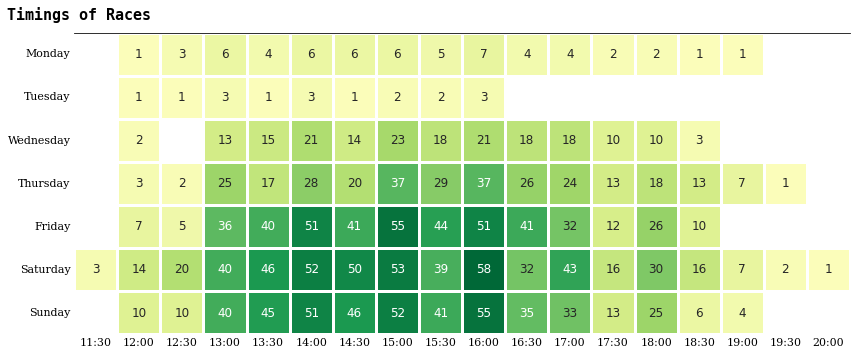

In [36]:
cs = pd.pivot_table(rd, index=['weekday'], columns=['post_time'], values='day_name', aggfunc=np.size)
day_map = rd[['weekday', 'day_name']].drop_duplicates().sort_values(by='weekday').set_index(keys='weekday').to_dict()['day_name']
cs.columns.name=''
cs.index = [day_map[a] for a in cs.index]


fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.heatmap(cs, xticklabels=cs.columns, yticklabels=cs.index, cmap='RdYlGn', square=True, linewidth=2.5,cbar=False,
            center=0, annot=True,  fmt='.0f', 
            ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)

fig.text(.012, .965, 'Timings of Races', fontweight='bold', fontfamily='monospace', fontsize=15,ha='left') 

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=0, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()